# Chapter 4 Trees and Graphs

from Gayle Laakmann McDowell's "Cracking the Coding Interview", 6th ed.

Ron Wu

## 4.1 check connectivity

In [2]:
def isRoute(G, n1, n2):
    '''check if exists a path from n1 to n2'''
    #convert G to adjacency list
    G_adj = {} 
    for edge in G:
        if edge[0] not in G_adj:
            G_adj[edge[0]] = [edge[1]]
        else:
            G_adj[edge[0]].append(edge[1])
            
    visited = set() 
    pathFound = [False]
    isRoute_helper(G_adj,n1,n2, visited, pathFound)
    return pathFound[0] == True
    
def isRoute_helper(G, n1, n2, visited, pathFound):
    if n1 not in G:
        return
    for child in G[n1]:
        if child == n2:
            pathFound[0] = True
            return  
        if child not in visited:
            visited.add(child)
            isRoute_helper(G, child, n2, visited, pathFound)
    

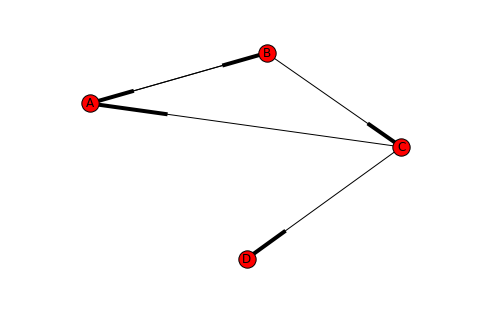

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

def draw_graph(graph): 
     
    G = nx.DiGraph()  
    nodes = set()    
    for edge in graph:
        G.add_edge(edge[0], edge[1])
        if edge[0] not in nodes:
            nodes.add(edge[0])
            G.add_node(edge[0])
        if edge[1] not in nodes:
            nodes.add(edge[1])
            G.add_node(edge[1])

    pos = nx.spring_layout(G) 
    nx.draw(G, pos, with_labels=True, arrows=True) 
    plt.show()

G = [('A', 'B'), ('B', 'C'), ('C', 'D'), ('B','A'), ('C','A')]
draw_graph(G)


In [4]:
print 'Is there a path from A to B?',isRoute(G,'A','B')
print 'Is there a path from A to D?',isRoute(G,'A','D') 
print 'Is there a path from D to A?',isRoute(G,'D','A') 

Is there a path from A to B? True
Is there a path from A to D? True
Is there a path from D to A? False


## 4.2 convert sorted array to a full balanced BST

In [5]:
class TreeNode(object):
    def __init__(self, data, left=None, right=None):
        self.data = data
        self.left = [left]  #box it to an object so pass by ref
        self.right = [right]
        
class BinarySeachTree(object):
    def __init__(self, Node = None):
        self.root = [Node]
        
    def insert(self, data):   
        self._insert(data, self.root)
        
    def _insert(self, data, root):
        if root[0] == None: 
            root[0] = TreeNode(data)
            return
        
        if root[0].data > data:
            self._insert(data, root[0].left)
            
        elif root[0].data < data:
            self._insert(data, root[0].right)
        #ignore duplicate items    
        
    def height(self):
        return self._height(self.root)
        
    def _height(self, root):
        if root[0] == None:
            return 0
        return max(self._height(root[0].right), self._height(root[0].left))+1
        
    
def buildBst(arr):
    #assume arr is sorted 
    tree = BinarySeachTree() 
    _buildBst(arr, tree)
    return tree

def _buildBst(arr, tree):
    if len(arr) == 1:
        tree.insert(arr[0])
        return
    n = len(arr)/2
    tree.insert(arr[n])
    _buildBst(arr[:n], tree)
    if len(arr) > 2:
        _buildBst(arr[n+1:], tree)
    

In [6]:
arr=[x for x in range(1, 2**4)]
print arr
binaryTree = buildBst(arr)
print 'height: ',binaryTree.height() ,' indeed is mininal!'
print 'head of tree:', binaryTree.root[0].data 
print 'first left child:', binaryTree.root[0].left[0].data  
print 'right grandchild of left child:',binaryTree.root[0].left[0].right[0].data  

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
height:  4  indeed is mininal!
head of tree: 8
first left child: 4
right grandchild of left child: 6


## 4.3 convert level tree to multiple linked ist

In [7]:
#LL copied from my chapter 2 solution

class LLNode(object):
    def __init__(self, data = None, nd = None):
        self.val = data
        self.nextNode = nd
        
    def getVal(self):
        return self.val
    
    def getNext(self):
        return self.nextNode
    
    def linkNext(self, nd):
        self.nextNode = nd

import sys

class linkedList(object):
    def __init__(self, nd = None):
        self.head = nd
        self.size = 0
        if self.head != None:
            self.size = 1
        
    def addNode(self, nd):  
        nd.linkNext(self.head)
        self.head = nd
        self.size += 1 
        
    def displayAllValue(self):
        if self.size == 0:
            print 'nothing to show'
            
        cur = self.head    
        count = 0
        while cur and count < self.size + 1:
            sys.stdout.write(str(cur.getVal()) + ' ')
            cur = cur.getNext()
            count += 1
    
    def getSize(self):
        if self.head == None:
            return 0
        return self.size
      
            

In [8]:
def turnBTtoMLL(bt):
    multiLL = []
    heights = bt.height()
    for i in range(heights):
        ll = linkedList()        
        multiLL.append(ll)
        
    _turnBTtoMLL(bt.root[0], multiLL, 0)
    return multiLL
        
def _turnBTtoMLL(root, multiLL, depth):
    if root == None:
        return
    multiLL[depth].addNode(LLNode(root.data))
    _turnBTtoMLL(root.left[0], multiLL, depth+1)
    _turnBTtoMLL(root.right[0], multiLL, depth+1)
        

In [9]:
arr=[x for x in range(1, 2**4)]
print arr
binaryTree = buildBst(arr)

mLL = turnBTtoMLL(binaryTree)
for i in range(len(mLL)):
    print i, 'depth: ', 
    mLL[i].displayAllValue()
    print

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
0 depth: 8 
1 depth: 12 4 
2 depth: 14 10 6 2 
3 depth: 15 13 11 9 7 5 3 1 


## 4.4 check a binary tree is balanced

In [10]:
def isBalanced(bt):
    return _isBalanced(bt.root[0])

def _isBalanced(root):
    if root == None:
        return 0
    dif = _isBalanced(root.right[0])-_isBalanced(root.left[0])
    return dif in [-1, 0, 1]

In [11]:
arr=[x for x in range(1, 2**4)]
print 'input:', arr
binaryTree = buildBst(arr)

print 'Is it balanced? ',isBalanced(binaryTree)

input: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Is it balanced?  True


## 4.5 check if a binary tree is bst

In [12]:
def isBST(bt): 
    found = [False]
    _isBST(bt.root[0], found)
    return found == [False]
    

def _isBST(root, found):
    if root == None or found[0] == True:
        return
    if root.left != None:
        if root.left[0].data >= root.data:
            found[0] = True
            return
        _isBST(root.left[0], found)
    
    if found[0] ==True: #short circuit it if found
        return
    
    if root.right != None:
        if root.right[0].data <= root.data:
            found[0] = True
            return
        _isBST(root.right[0], found)

In [13]:
arr=[x for x in range(1, 2**4)]
print 'input:', arr
binaryTree = buildBst(arr)

print 'Is it BST? ',isBalanced(binaryTree)

input: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Is it BST?  True


## 4.6 given a node, return its right child

In [14]:
def itsRightChild(root):
    if root==None:
        return None
    return root.right[0]

arr=[x for x in range(1, 2**4)]
print 'input:', arr
bt = buildBst(arr)

child = itsRightChild(bt.root[0].left[0])
print 'the right child of', bt.root[0].left[0].data,'is',child.data

input: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
the right child of 4 is 6


## 4.7 kind like converting a directed graph to a tree

In [15]:
def findDependency(G):
    #convert directed G to adjacency list 
    G_adj = {} 
    source = set()
    sinks = set()
    for edge in G:
        if edge[0] != edge[1]:
            if edge[0] not in G_adj:
                G_adj[edge[0]] = [edge[1]]
            else:
                G_adj[edge[0]].append(edge[1])
            
            if edge[0] not in source:
                source.add(edge[0]) 
            if edge[1] not in sinks:    
                sinks.add(edge[1])
        else:
            source.add(edge[1])
            
    result = []
    visited = set()
    startNodes = source - sinks #not depend on anything 
    for s in startNodes: 
        result.append(s)
        visited.add(s)
        _findDependency_help(G_adj,visited, result, s)  
    
    return result

def _findDependency_help(G_adj, visited, result, s):
    if s in G_adj:
        for n in G_adj[s]:
            if n not in result:
                result.append(n)  
        for n in G_adj[s]: 
            if n not in visited:
                visited.add(n)
                _findDependency_help(G_adj, visited, result, n)


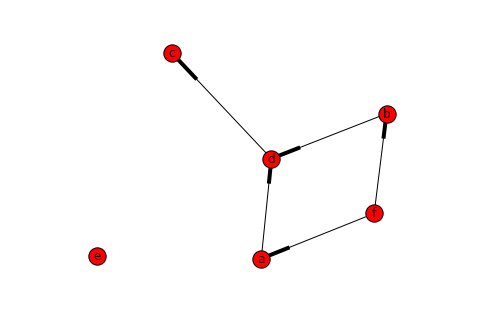

In [16]:
G = [('e','e'),('a', 'd'), ('f', 'b'), ('b', 'd'), ('f','a'), ('d','c')]
draw_graph(G)

In [17]:
print 'dependency:',findDependency(G)

dependency: ['e', 'f', 'b', 'a', 'd', 'c']


## 4.8 find the lowest common ancestor of two nodes in bt

In [18]:
#no storing, so no tracing back parents
def _isInSubtree(bt, root, n1, n2, found): 
    if found[0] == True and found[1] == True: 
        return True 
    if root == None:
        return False
    
    if root == n1: 
        found[0] = True
    if root == n2:
        found[1] = True
        
    if found[0] == True and found[1] == True: 
        return True
    
    a = _isInSubtree(bt, root.left[0], n1, n2, found)    
    b = _isInSubtree(bt, root.right[0], n1, n2, found)    
    return a or b

    
def findComAncestor(bt, n1, n2, root = 'head'):
    if root == None: 
        return None
    if root == 'head':
        root = bt.root[0]
    
    found = [False, False]
    foundLeft  = [False, False]
    foundRight = [False, False] 
    if _isInSubtree(bt, root, n1, n2, found)== True:
        if _isInSubtree(bt, root.left[0], n1, n2, foundLeft)== False and\
        _isInSubtree(bt, root.right[0], n1, n2, foundRight)== False: 
             return root
     
        a = findComAncestor(bt, n1, n2, root.left[0])
        if a != None:
            return a
        a = findComAncestor(bt, n1, n2, root.right[0])
        if a != None:
            return a 
    return None


In [19]:
arr = [x for x in range(1, 2**10)] 
bt = buildBst(arr)

n1 = bt.root[0].left[0].right[0]
n2 = bt.root[0].left[0].left[0].right[0]

print 'the commom ancestor of',n1.data,'and',n2.data, \
 'is',findComAncestor(bt,n1,n2).data,'which should equal to',\
    bt.root[0].left[0].data

the commom ancestor of 384 and 192 is 256 which should equal to 256


## 4.9 display all arrays will give to build the same bst

In [22]:
def squenceBST(bt):
    #build a dependency 
    dep = {bt.root[0].data:set([])} 
    _buildDep(bt, dep, bt.root[0])
    seqArr = [bt.root[0].data]
    _squenceBST(dep, seqArr)


import pickle
import copy
def _squenceBST(dep, seqArr): 
    if len(dep) == len(seqArr):
        print seqArr
        return
    arr = copy.copy(seqArr) 
    for e in dep:
        if e not in arr:
            if dep[e] <= set(arr):  
                _squenceBST(dep, arr+[e])


def _buildDep(bt, dep, root):
    if root == None:
        return
    if root.left[0] != None:
        dep[root.left[0].data] = set([root.data]) | dep[root.data]
        _buildDep(bt, dep, root.left[0])
    
    if root.right[0] != None:
        dep[root.right[0].data] = set([root.data]) | dep[root.data]
        _buildDep(bt, dep, root.right[0])

In [23]:
arr = [5,2,1,6,8] 
bt = BinarySeachTree()
for a in arr:
    bt.insert(a)

squenceBST(bt)  

[5, 2, 1, 6, 8]
[5, 2, 6, 8, 1]
[5, 2, 6, 1, 8]
[5, 6, 8, 2, 1]
[5, 6, 2, 8, 1]
[5, 6, 2, 1, 8]


## 4.10 check if one binary tree is a subtree of the other

In [24]:
def isASubtree(tb, ts_root):
    comfirm = [False]
    _isASubtree(tb,tb.root[0],ts_root, comfirm)
    return comfirm[0]

def _isASubtree(tb, broot, sroot, comfirm):
    if comfirm[0] == True or broot == None:
        return
    if broot == sroot:
        comfirm[0] = True
        return
    _isASubtree(tb, broot.left[0], sroot, comfirm)
    _isASubtree(tb, broot.right[0], sroot, comfirm)


In [25]:
arr = [5,2,1,6,8] 
bt = BinarySeachTree()
for a in arr:
    bt.insert(a)

isASubtree(bt, bt.root[0].left[0])

True

## 4.11 return a random note from the tree w/ equal prob

In [26]:
import random
#random.seed(615)
def randomNodes(bt):
    totalNodes = countNodes(bt, bt.root[0]) 
    ran = [random.randint(1, totalNodes)]
    print 'The random number is',ran[0], 'which is between 1 and' , totalNodes
    return _randomNodes(bt, bt.root[0], ran)
    
def _randomNodes(bt, root, ran):
    if ran[0] == 1:
        return root 
    
    if root.left[0] != None:
        ran[0] -= 1
        a = _randomNodes(bt, root.left[0], ran)
        if a != None:
            return a
    if root.right[0] != None:
        ran[0] -= 1
        a = _randomNodes(bt, root.right[0], ran)
        if a != None:
            return a
    
def countNodes(bt, root):
    if root == None:
        return 0
    return countNodes(bt, root.left[0]) + countNodes(bt, root.right[0]) + 1

In [27]:
arr = [5,2,1,6,8] 
bt = BinarySeachTree()
for a in arr:
    bt.insert(a)
    
o = randomNodes(bt).data
print 'the random output:', o

The random number is 4 which is between 1 and 5
the random output: 6


## 4.12 find the number of paths raise to the given sum

In [28]:
def numPathSum(bt, sumNum):  
    return _numPathSum(bt, bt.root[0], sumNum) 

def _numPathSum(bt, root, sumNum):
    if root == None:
        return 0
    found = 0
    if sumNum == root.data:
        found += 1
    found += _numPathStartHere(bt, root.left[0], sumNum-root.data) +\
     _numPathStartHere(bt, root.right[0], sumNum-root.data)
     
    return found + _numPathSum(bt, root.left[0], sumNum) + \
    _numPathSum(bt, root.right[0], sumNum)

def _numPathStartHere(bt, root, sumNum):
    if root == None:
        return 0
    found = 0
    if sumNum == root.data:
        found += 1
    return found + _numPathStartHere(bt,root.left[0],sumNum-root.data) +\
        _numPathStartHere(bt, root.right[0], sumNum-root.data) 

In [29]:
arr = [5,2,-2,3,6,8] 
bt = BinarySeachTree()
for a in arr:
    bt.insert(a)
    
print 'number of paths summing to 5 is', numPathSum(bt, 5)    

number of paths summing to 5 is 3
